#### Bartosz Piłat, Norbert Gwiazda
# Analiza zbioru *Apartment Prices in Poland*
*https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data*

##### Termin zakończenia projektu: 25.01.2025 r.


## 1. Przygotowanie zbioru

Na początek powinniśmy zaimportować wszystkie potrzebne pakiety do przeprowadzenia analizy.

In [1]:
!where python

C:\Users\NorbeeG\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

sciezka_do_folderu_data="data"

In [3]:
import os
def create_DataFrame_from_data_in_folder(folder_path):
  df = pd.DataFrame()
  row_count = 0
  for file in os.listdir(folder_path):
      if(file.endswith('.csv')):
        tmp = pd.read_csv(folder_path+'/'+file)
        row_count += tmp.shape[0]
        df = pd.concat([df,tmp])

  if(row_count!=df.shape[0]):
    raise Exception("Data from folder was not inserted correctly into DataFrame")
    return
  return df


W celu globalnej analizy danych dane muszą zostać najpierw załadowane do DataFrame'a.

In [4]:
buy_data = create_DataFrame_from_data_in_folder(sciezka_do_folderu_data+'/buy')
rent_data = create_DataFrame_from_data_in_folder(sciezka_do_folderu_data+'/rent')
buy_data.set_index("id", inplace=True)
rent_data.set_index("id", inplace=True)
buy_data = buy_data.loc[~buy_data.index.duplicated(keep='first')]
rent_data = rent_data.loc[~rent_data.index.duplicated(keep='first')]
buy_data.head()
rent_data.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
id,,,,,,,,,,,,,,,,,,,,,
2a1a6db97ff122d6bc148abb6f0e498a,szczecin,blockOfFlats,52.0,2.0,3.0,3.0,2008.0,53.460535,14.545416,4.26,...,0.307,condominium,brick,NaN,yes,yes,no,no,no,3500
5a0cb42c088eadf75aa98a4118640048,szczecin,blockOfFlats,57.0,3.0,NaN,10.0,1976.0,53.440955,14.566024,1.98,...,0.189,condominium,NaN,premium,no,yes,yes,no,no,3000
996722490efcb4b34d48bb84a9a72838,szczecin,NaN,43.4,2.0,3.0,4.0,NaN,53.435746,14.560764,1.37,...,0.211,condominium,NaN,NaN,no,yes,no,no,no,1900
50d75c688530b9a61ba505301e0b94a9,szczecin,apartmentBuilding,32.6,2.0,5.0,6.0,2021.0,53.421582,14.541572,1.30,...,0.192,condominium,brick,premium,no,yes,yes,no,no,2500
9b187f4203adabf466fd08610d8f4e5e,szczecin,apartmentBuilding,72.0,3.0,6.0,6.0,2014.0,53.450010,14.547230,3.10,...,0.315,condominium,brick,premium,no,yes,yes,no,yes,2999


In [5]:
buy_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92967 entries, f8524536d4b09a0c8ccc0197ec9d7bde to 42018b7b653cc30ef52d4fc75e47cdac
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  92967 non-null  object 
 1   type                  73175 non-null  object 
 2   squareMeters          92967 non-null  float64
 3   rooms                 92967 non-null  float64
 4   floor                 76983 non-null  float64
 5   floorCount            91885 non-null  float64
 6   buildYear             77326 non-null  float64
 7   latitude              92967 non-null  float64
 8   longitude             92967 non-null  float64
 9   centreDistance        92967 non-null  float64
 10  poiCount              92967 non-null  float64
 11  schoolDistance        92907 non-null  float64
 12  clinicDistance        92634 non-null  float64
 13  postOfficeDistance    92868 non-null  float64
 14  kindergartenDista

Ustawienie prawidłowych typów dla poszczególnych atrybutów.

In [6]:
for col in buy_data.columns:
    print(f"{col} - {buy_data[col].nunique()}")

city - 15
type - 3
squareMeters - 7173
rooms - 6
floor - 27
floorCount - 29
buildYear - 165
latitude - 46449
longitude - 48233
centreDistance - 1487
poiCount - 196
schoolDistance - 2505
clinicDistance - 4263
postOfficeDistance - 2689
kindergartenDistance - 2309
restaurantDistance - 2406
collegeDistance - 4817
pharmacyDistance - 2420
ownership - 3
buildingMaterial - 2
condition - 2
hasParkingSpace - 2
hasBalcony - 2
hasElevator - 2
hasSecurity - 2
hasStorageRoom - 2
price - 7287


In [7]:
dane_kategoryczne = ["city", "type", "ownership", "buildingMaterial"]


buy_data[dane_kategoryczne] = buy_data[dane_kategoryczne].astype("category")
rent_data[dane_kategoryczne] = rent_data[dane_kategoryczne].astype("category")





## 2. Analiza eksploracyjna zbioru

In [8]:
def analize_data(df, data_name):
  print("Analysis of: "+data_name)
  print("Number of objects: ", df.shape[0])
  print("Number of attributes: ", df.shape[1])
  print("Attributes: ", df.columns)
  print("Number of objects with at least 1 missing value: %d" % df.isnull().any(axis=1).sum())
  print("Number of missing values in attributes:")
  missing_val_count_by_column = (df.isnull().sum())
  missing_val= (missing_val_count_by_column[missing_val_count_by_column > 0])
  for column, count in missing_val.items():
    print("  %s: %d  (%.2f%%)" % (column, count, count/df.shape[0]*100))
  print()

In [9]:
analize_data(buy_data, "buy_data")
analize_data(rent_data,"rent_data")

Analysis of: buy_data
Number of objects:  92967
Number of attributes:  27
Attributes:  Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 82056
Number of missing values in attributes:
  type: 19792  (21.29%)
  floor: 15984  (17.19%)
  floorCount: 1082  (1.16%)
  buildYear: 15641  (16.82%)
  schoolDistance: 60  (0.06%)
  clinicDistance: 333  (0.36%)
  postOfficeDistance: 99  (0.11%)
  kindergartenDistance: 85  (0.09%)
  restaurantDistance: 226  (0.24%)
  collegeDistance: 2492  (2.68%)
  pharmacyDistance: 128  (0.14

Przeprowadzamy analizę zbiorów
  
### 2.1 Analiza danych numerycznych

Podział danych na numeryczne i kategoryczne

In [10]:
for col in buy_data.columns:
    print(f"{col} - {buy_data[col].nunique()}")

city - 15
type - 3
squareMeters - 7173
rooms - 6
floor - 27
floorCount - 29
buildYear - 165
latitude - 46449
longitude - 48233
centreDistance - 1487
poiCount - 196
schoolDistance - 2505
clinicDistance - 4263
postOfficeDistance - 2689
kindergartenDistance - 2309
restaurantDistance - 2406
collegeDistance - 4817
pharmacyDistance - 2420
ownership - 3
buildingMaterial - 2
condition - 2
hasParkingSpace - 2
hasBalcony - 2
hasElevator - 2
hasSecurity - 2
hasStorageRoom - 2
price - 7287


In [11]:
numeric_columns = ["squareMeters", "rooms", "floor", "floorCount", "buildYear", "latitude", "longitude", "centreDistance", "poiCount", "schoolDistance", "clinicDistance", "postOfficeDistance", "kindergartenDistance", "restaurantDistance", "collegeDistance", "pharmacyDistance", "price"]
category_columns = ["city", "type", "ownership", "buildingMaterial", "condition", "hasParkingSpace", "hasBalcony", "hasElevator", "hasSecurity", "hasStorageRoom"]

Narysujmy wykresy dla danych w celu lepszego zobrazowania sobie zbioru


In [12]:
buy_data_numerics = buy_data.copy()
rent_data_numerics = rent_data.copy()
buy_data_numerics.head()

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
id,,,,,,,,,,,,,,,,,,,,,
f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


92967
37941


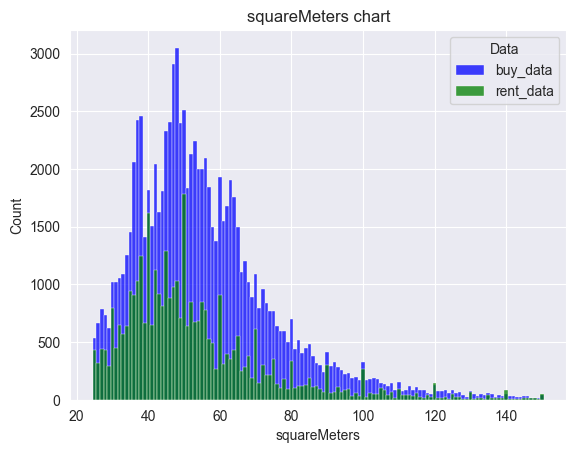

92967
37941


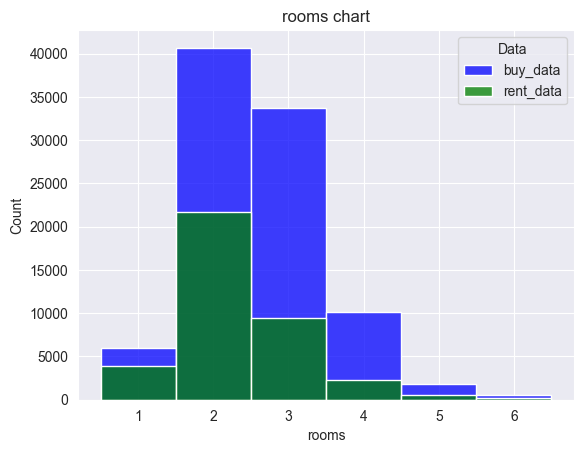

76983
33295


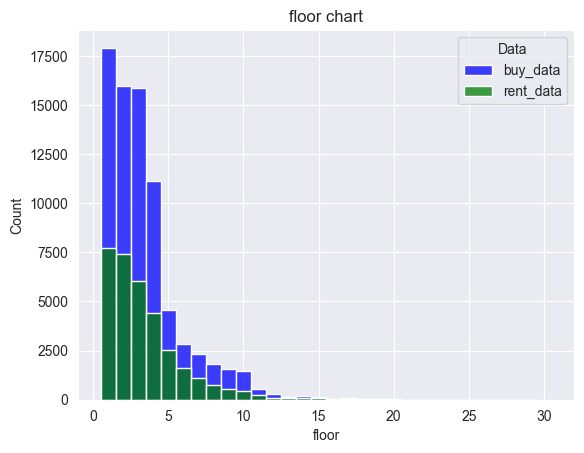

91885
37211


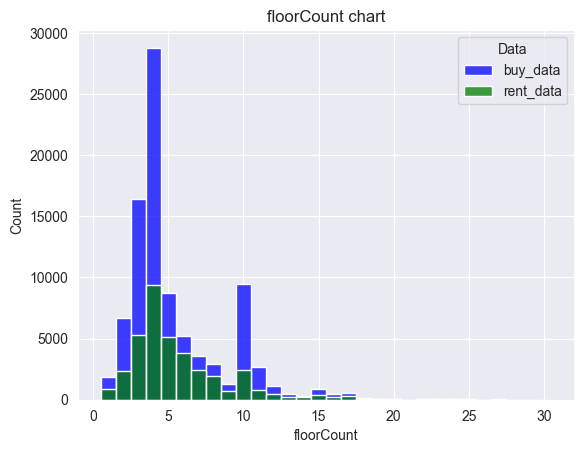

77326
27371


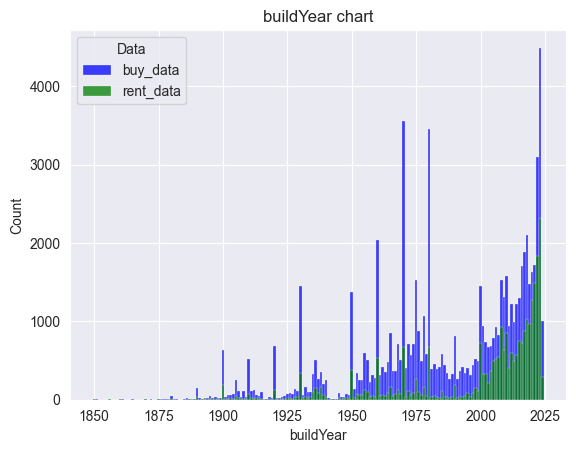

92967
37941


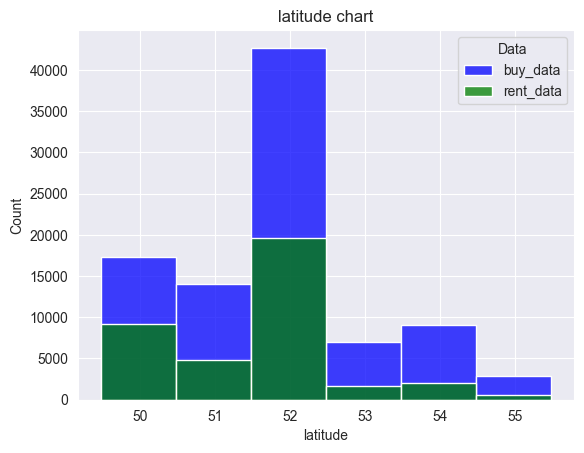

92967
37941


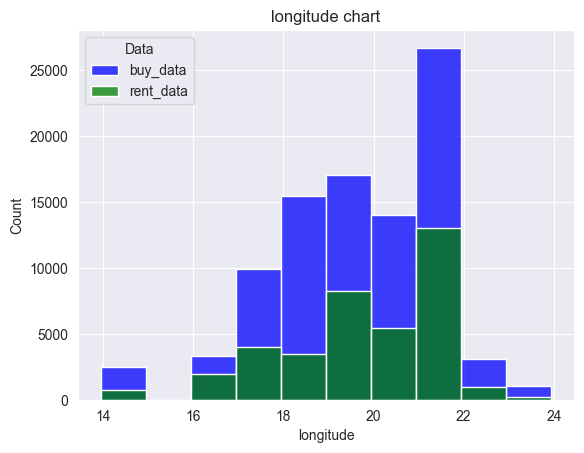

92967
37941


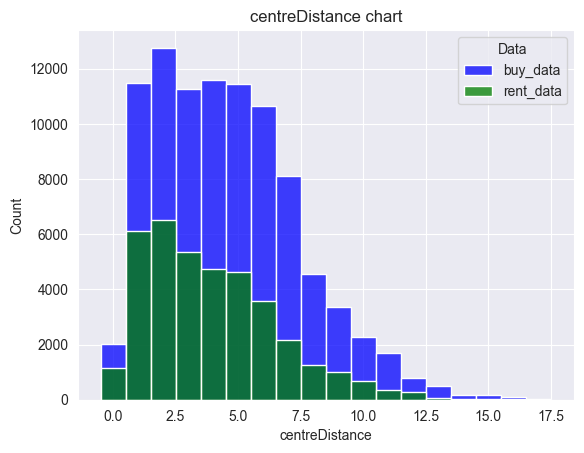

92967
37941


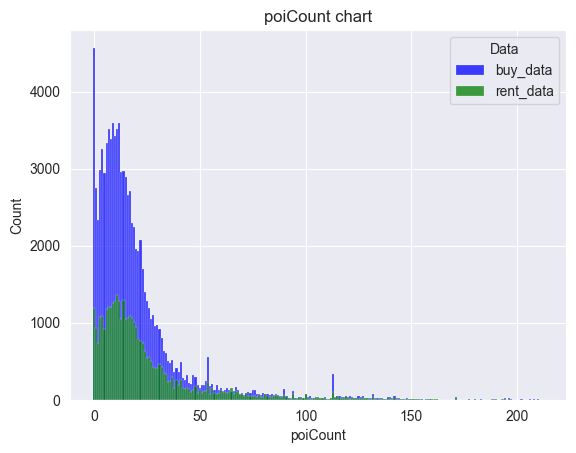

92907
37930


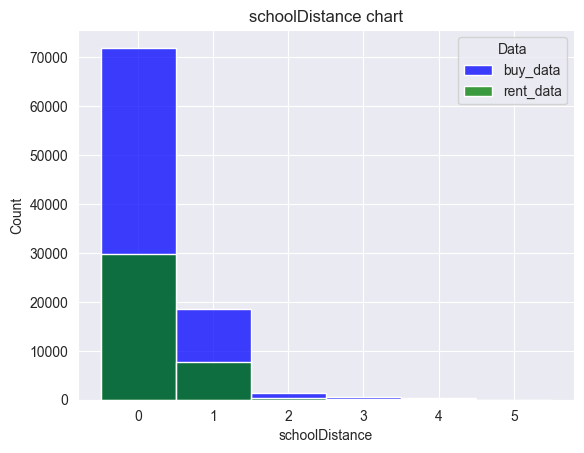

92634
37909


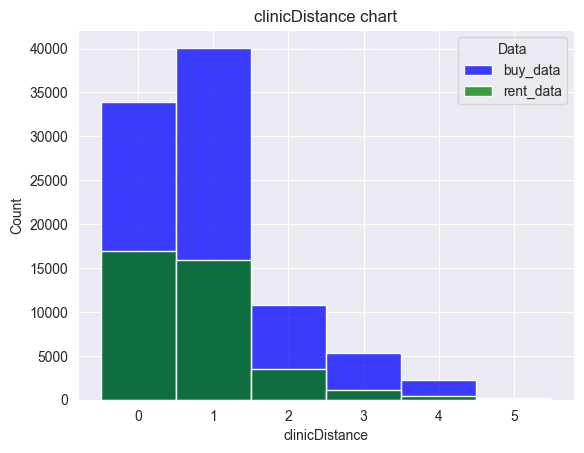

92868
37922


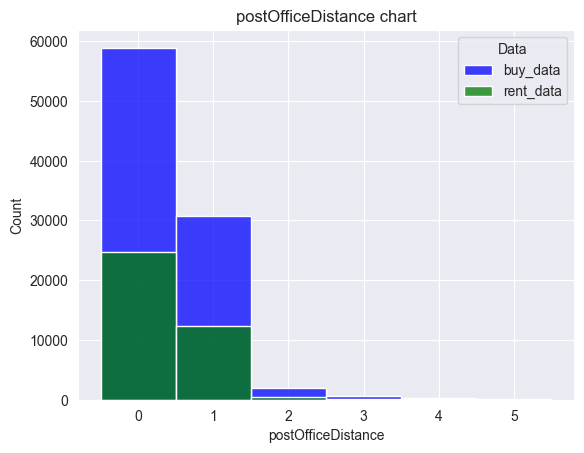

92882
37913


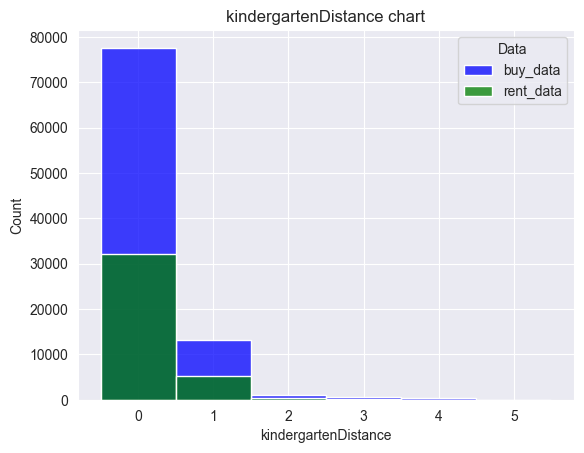

92741
37859


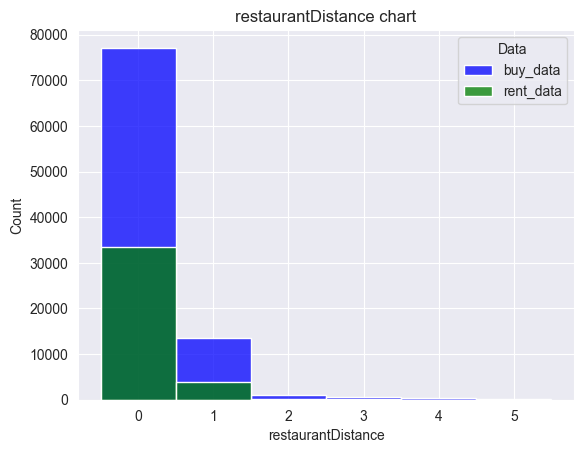

90475
37451


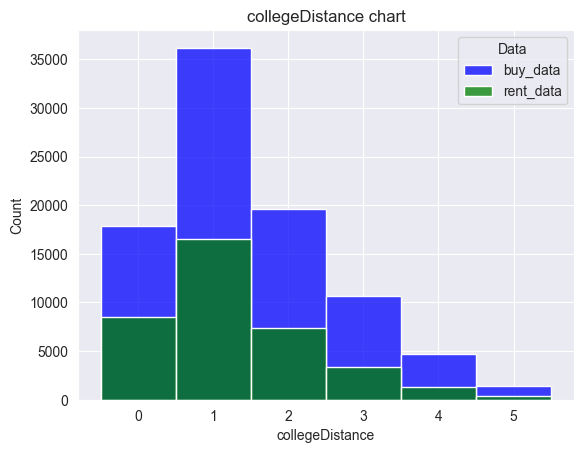

92839
37903


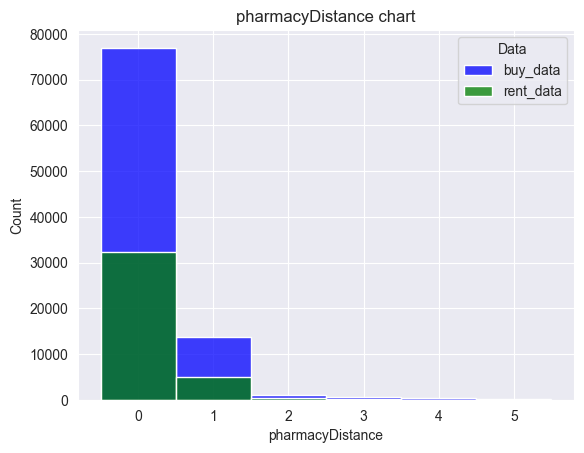

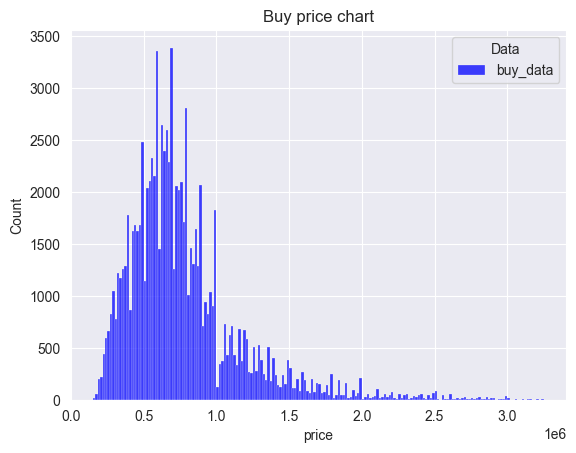

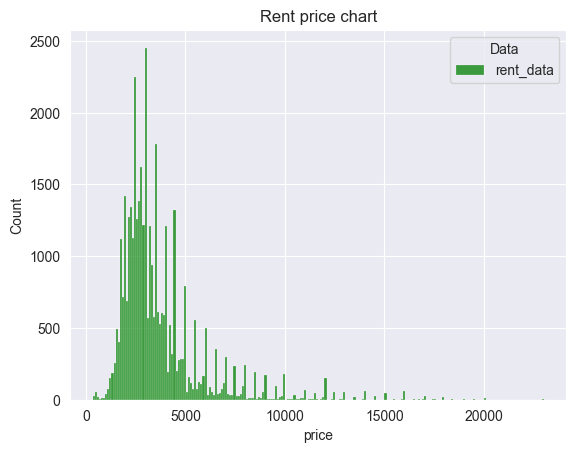

In [13]:
for column in numeric_columns[:-1]:
    buy_tmp = pd.DataFrame(buy_data_numerics[column].dropna())
    rent_tmp = pd.DataFrame(rent_data_numerics[column].dropna())
    print(buy_tmp.shape[0])
    print(rent_tmp.shape[0])
    if column in ["squareMeters", "rooms", "floor", "floorCount", "buildYear", "poiCount", "price"]:
        buy_tmp = buy_tmp.astype("int")
        rent_tmp = rent_tmp.astype("int")
    
    
    num_bins = 50
    sns.histplot(data=buy_tmp, x=column, color="blue", label="buy_data", bins=num_bins, discrete=True)
    sns.histplot(data=rent_tmp, x=column, color="green", label="rent_data", bins=num_bins, discrete=True)

    plt.title(column + " chart")
    plt.legend(title="Data")
    plt.show()

sns.histplot(data=buy_data_numerics, x="price", color="blue", label="buy_data")
plt.title("Buy price" + " chart")
plt.legend(title="Data")
plt.show()
sns.histplot(data=rent_data_numerics, x="price", color="green", label="rent_data")

plt.title("Rent price" + " chart")
plt.legend(title="Data")
plt.show()



W celu analizy zbiorów pod kątem również outlinerów stworzymy boxploty dla poszczególnych atrybutów.

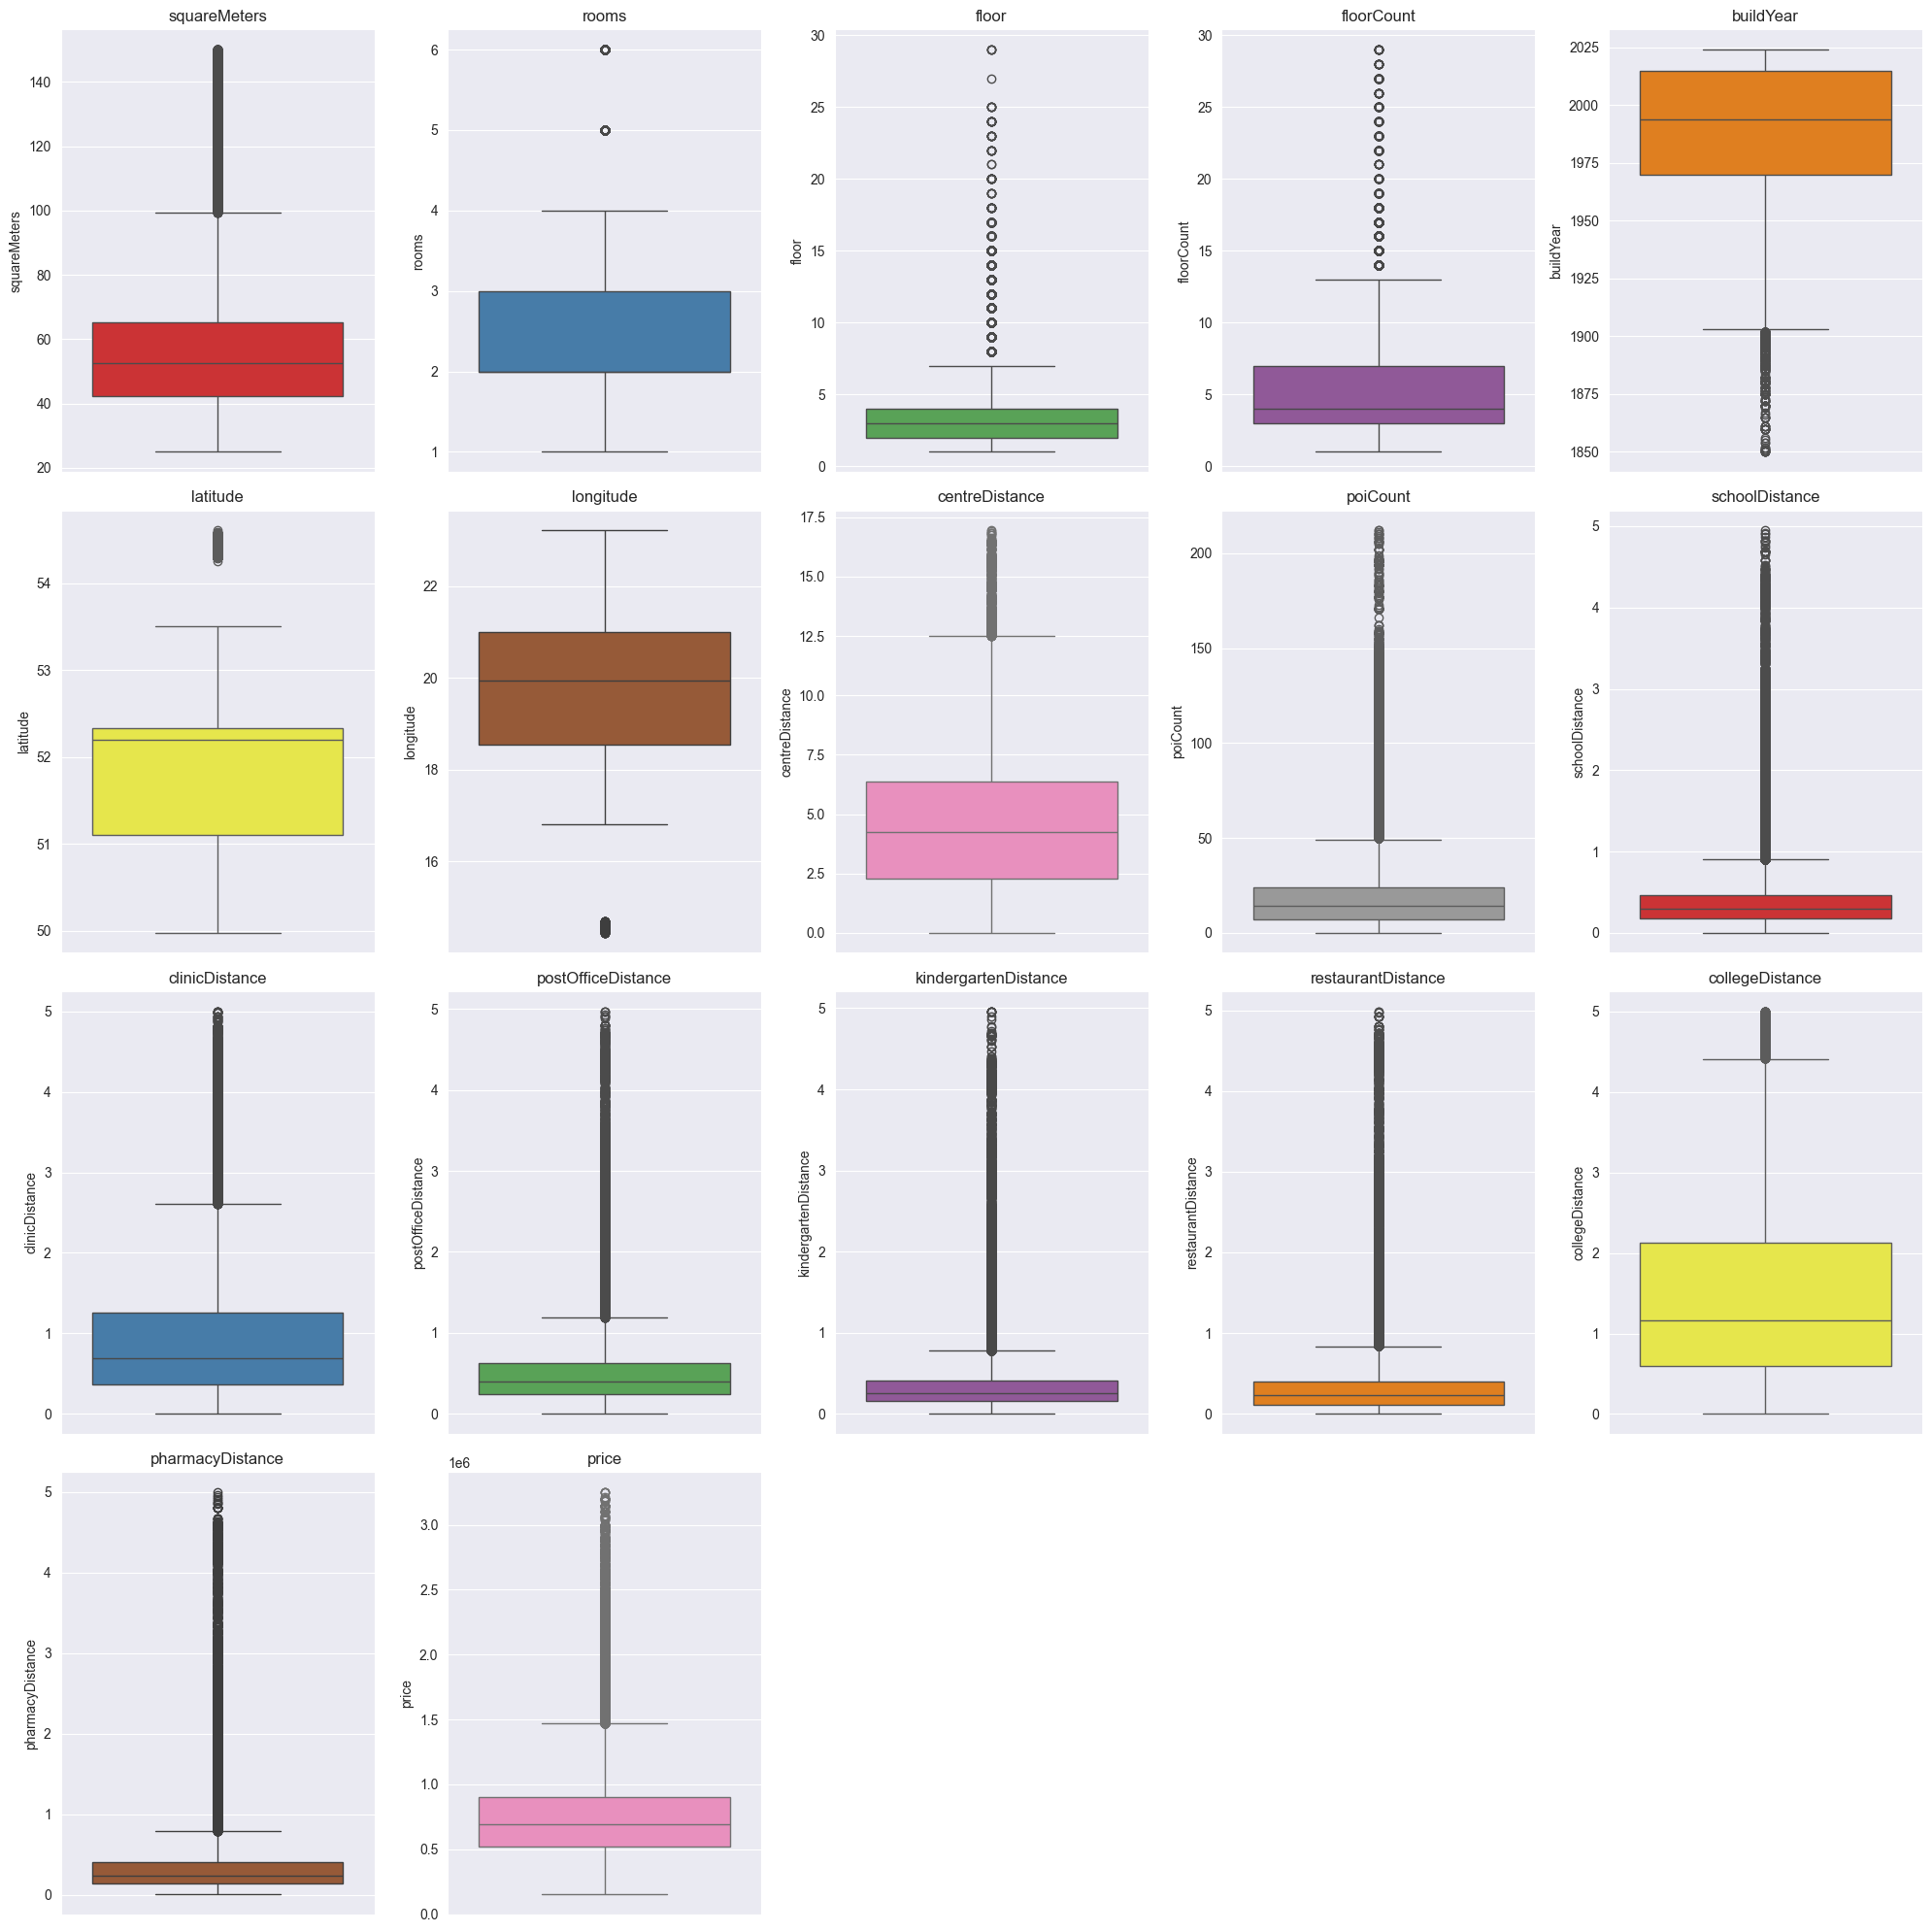

In [14]:
import math

colors = sns.color_palette("Set1", len(numeric_columns))
plt.figure(figsize=(20, 20))
MAX_WIDTH = 5
for i, column in enumerate(numeric_columns):
    plt.subplot(math.ceil(len(numeric_columns) / MAX_WIDTH), MAX_WIDTH, i + 1)
    sns.boxplot(data=buy_data_numerics, y=column, color=colors[i])
    plt.title(column)
    plt.tight_layout()

plt.show()

W poniższym badaniu przeprowadzimy stopień skorelowania poszczególnych wartości z ceną mieszkania.

['squareMeters', 'rooms', 'floor', 'floorCount', 'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance', 'collegeDistance', 'pharmacyDistance']


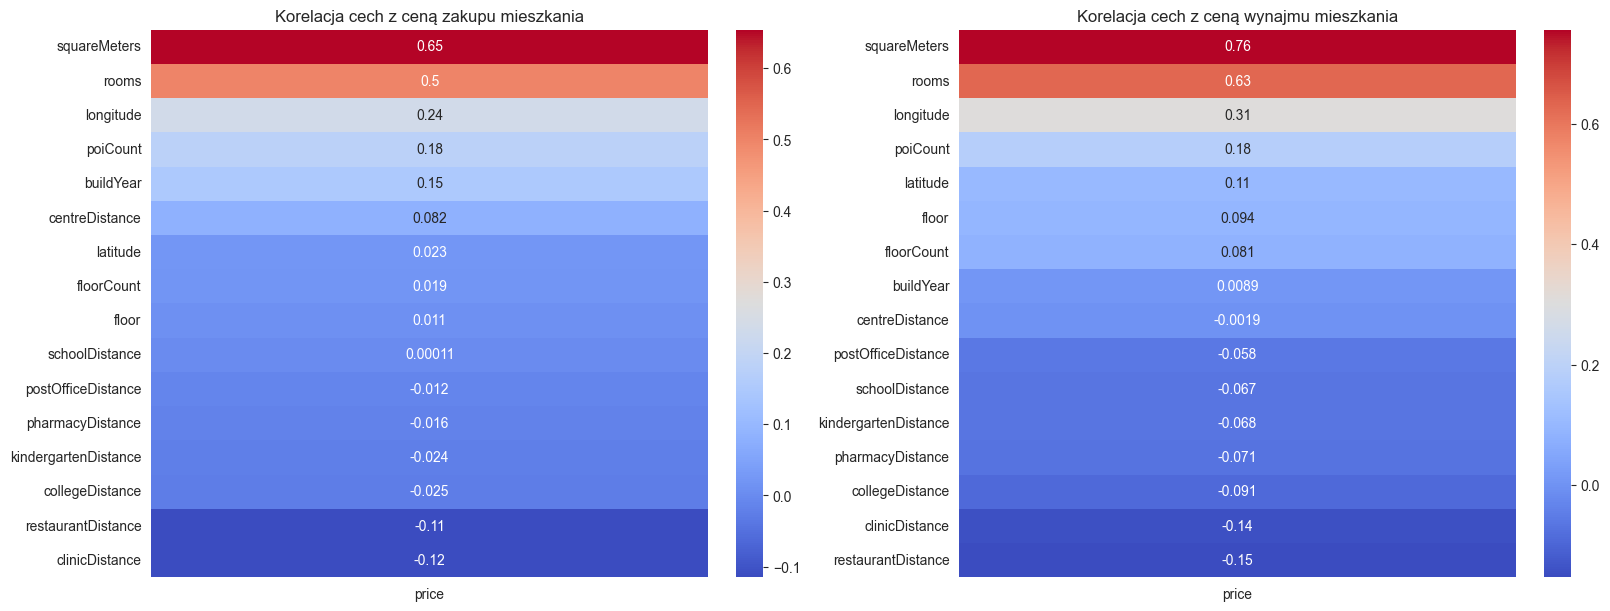

In [15]:

features = numeric_columns[:-1]
print(features)
features_to_buy_price_corr = buy_data[features].apply(lambda col: col.corr(buy_data['price']))
features_to_rent_price_corr = rent_data[features].apply(lambda col: col.corr(rent_data['price']))

buy_price_corr_df = pd.DataFrame(features_to_buy_price_corr, columns=['price']).sort_values(by='price', ascending=False)
rent_price_corr_df = pd.DataFrame(features_to_rent_price_corr, columns=['price']).sort_values(by='price', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16,6), constrained_layout=True)

sns.heatmap(buy_price_corr_df, annot=True, cmap="coolwarm", cbar=True, ax=axes[0])
axes[0].set_title("Korelacja cech z ceną zakupu mieszkania")

sns.heatmap(rent_price_corr_df, annot=True, cmap="coolwarm", cbar=True, ax=axes[1])
axes[1].set_title("Korelacja cech z ceną wynajmu mieszkania")
plt.show()

#### Wnioski: ####

Z danych można zaobserwować, że największy wpływ na wzrost ceny zarówno kupna, jak i wynajmu mieszkania ma jego powierzchnia oraz liczba pokojów. Niewielką korelację można też zaobserwować między ceną zakupu lub wynajmu mieszkania, a szerokością geograficzną na jakiej jest położone oraz liczbą points of interest w pobliżu.

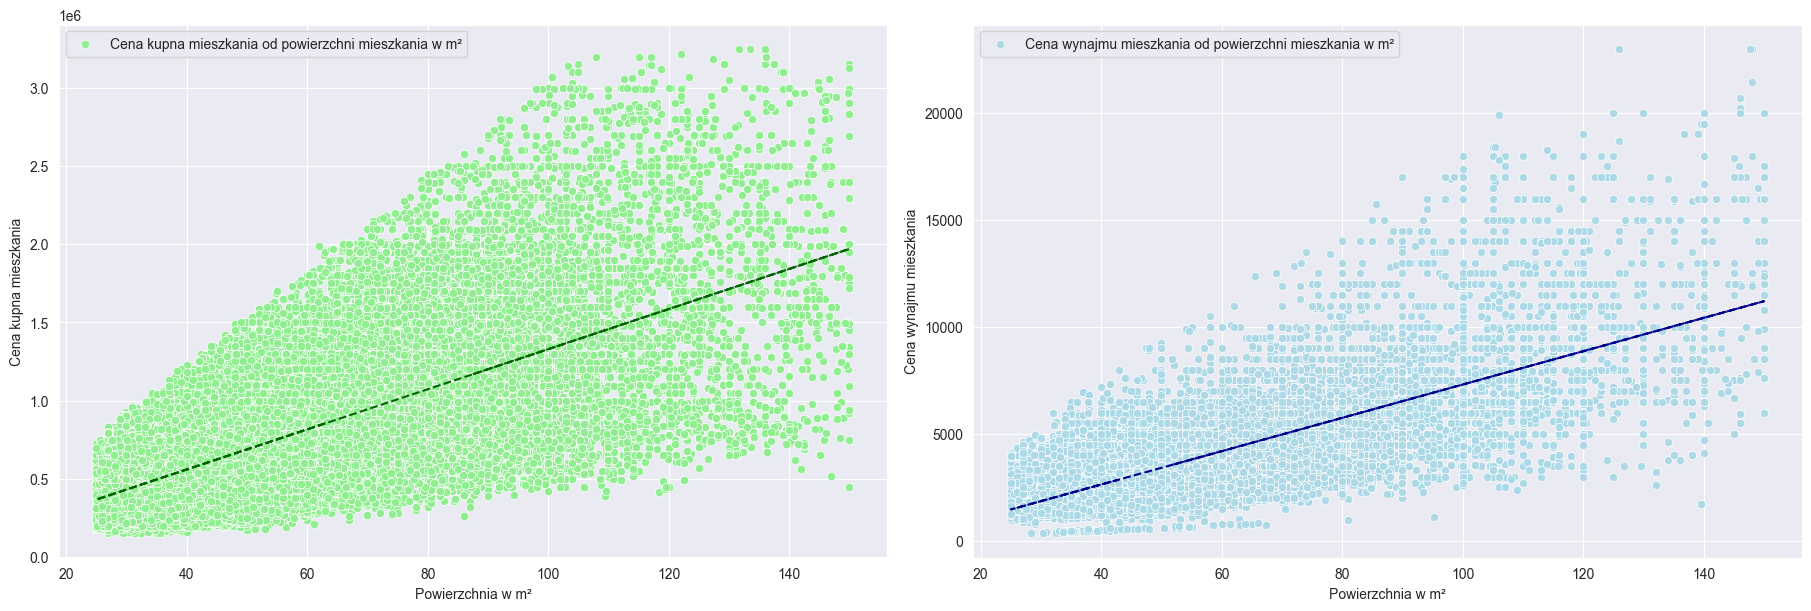

In [16]:
buy_x = buy_data['squareMeters']
rent_x = rent_data['squareMeters']

buy_y = buy_data['price']
rent_y = rent_data['price']

model_buy = LinearRegression()
model_rent = LinearRegression()

model_buy.fit(buy_x.values.reshape(-1,1), buy_y)
model_rent.fit(rent_x.values.reshape(-1,1), rent_y)

buy_trend = model_buy.predict(buy_x.values.reshape(-1,1))
rent_trend = model_rent.predict(rent_x.values.reshape(-1,1))

fig, axes = plt.subplots(1, 2, figsize=(18,6), constrained_layout=True)
sns.scatterplot(x=buy_x,y=buy_y, color='lightgreen', label='Cena kupna mieszkania od powierzchni mieszkania w m²', ax=axes[0])
sns.scatterplot(x=rent_x,y=rent_y, color='lightblue', label='Cena wynajmu mieszkania od powierzchni mieszkania w m²', ax=axes[1])

axes[0].plot(buy_x, buy_trend, color='darkgreen', linestyle='--', label='Linia trendu - Cena kupna mieszkania')
axes[1].plot(rent_x, rent_trend, color='darkblue', linestyle='--', label='Linia trendu - Cena wynajmu mieszkania')

axes[0].set_xlabel('Powierzchnia w m²')
axes[0].set_ylabel('Cena kupna mieszkania')

axes[1].set_xlabel('Powierzchnia w m²')
axes[1].set_ylabel('Cena wynajmu mieszkania')

plt.show()

Powyżej dwa wykresy punktowe oraz linia trendu wyznaczająca cenę kupna od powierzchni.


Poniższa heatmapa przedstawia skorelowanie atrybutów numerycznych ze sobą.

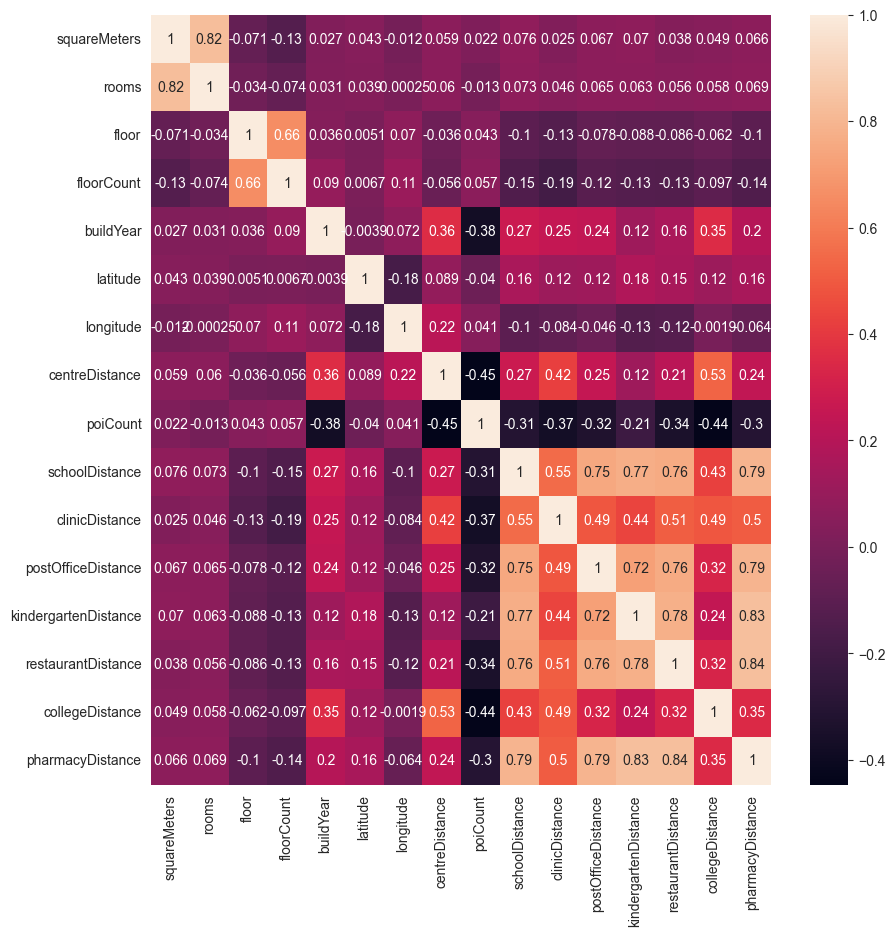

In [19]:
buy_tmp = buy_data[numeric_columns[:-1]].copy()
plt.figure(figsize = (10,10))
sns.heatmap(buy_tmp.corr(),annot = True)
plt.show()

### 2.2 Analiza danych kategorycznych

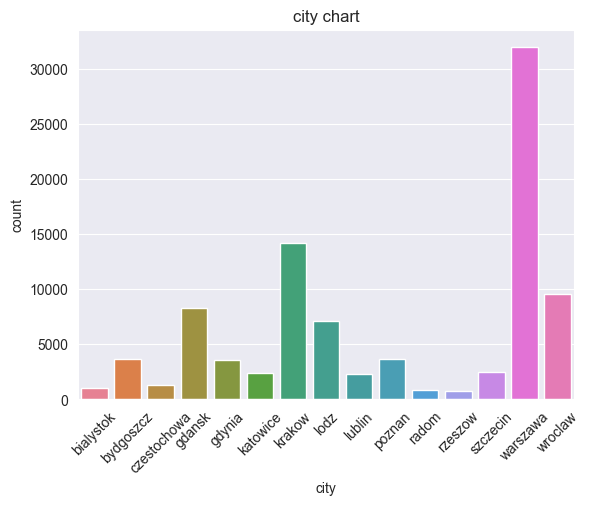

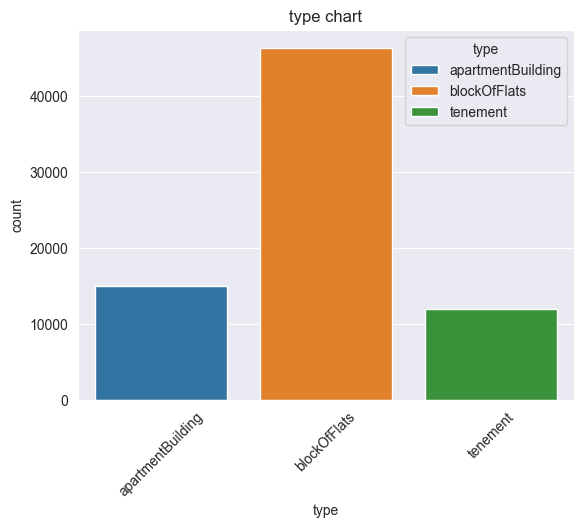

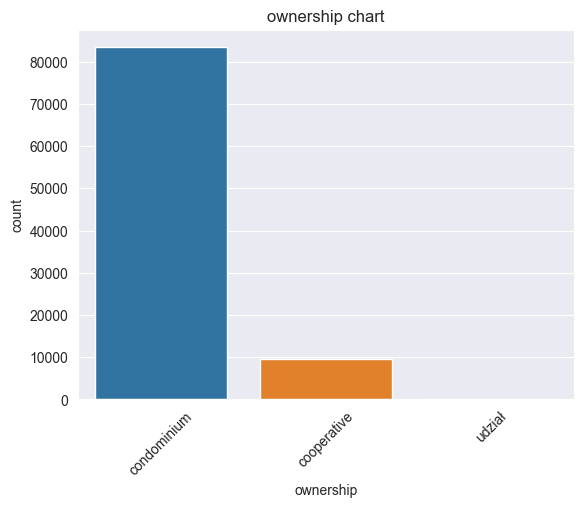

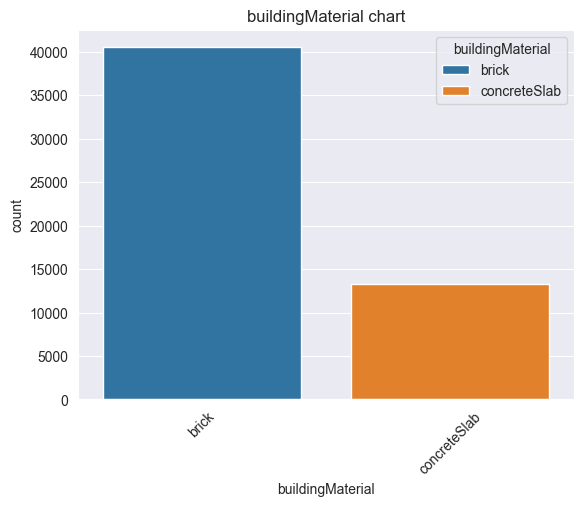

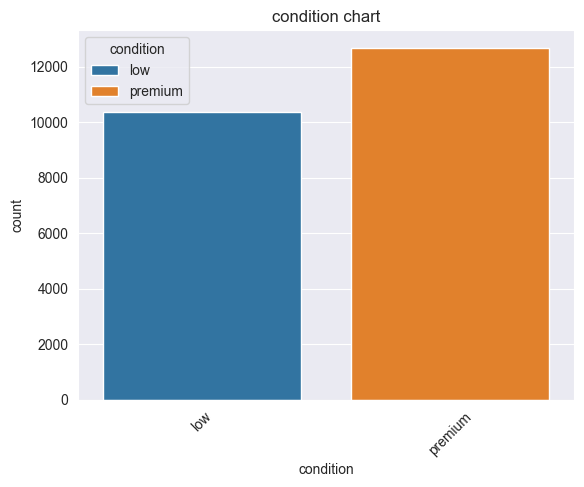

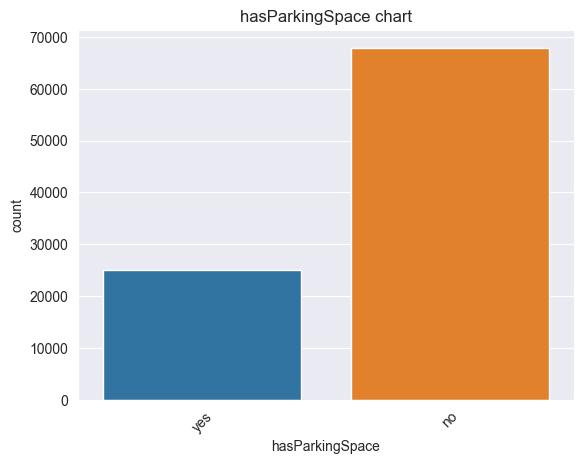

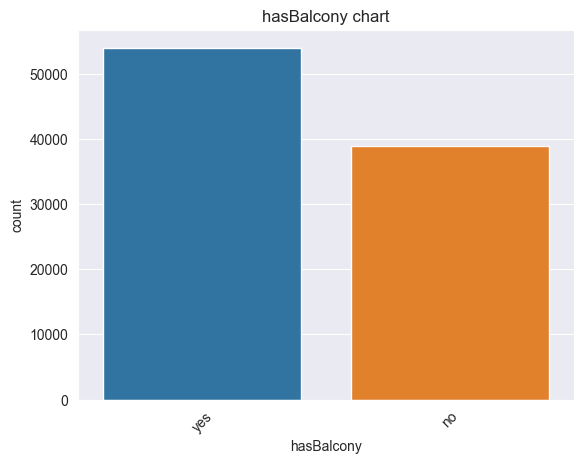

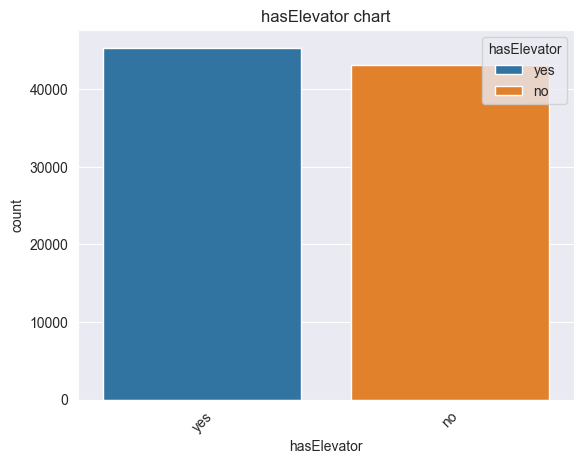

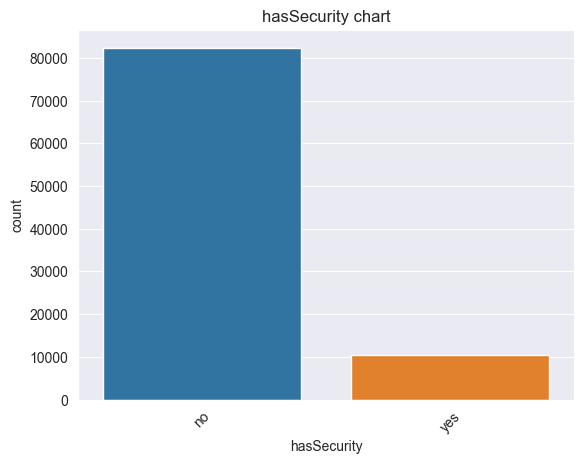

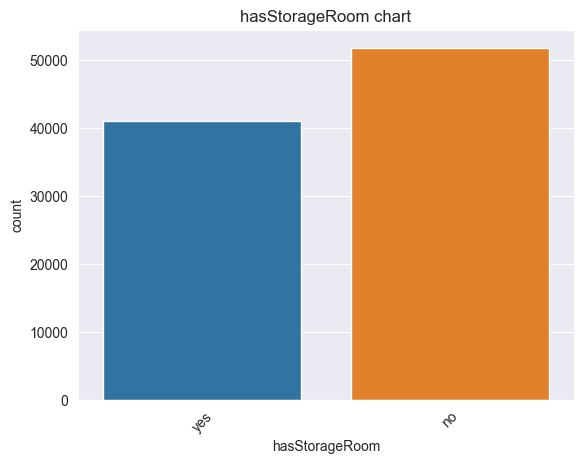

In [20]:
for column in category_columns:
    sns.countplot(data=buy_data, x=column, hue=column)
    plt.xticks(rotation=45)
    plt.title(column+" chart")
    plt.show()

## 3. Czyszczenie danych

Na podstawie przeanalizowanych załadowanych danych możemy rozpocząć czyszczenie danych.  
Jak można przeczytać w opisie zbioru atrybuty z suffixem 'Distance' są określone jedynie w przypadku, jeśli odległość od danego punktu jest mniejsza niż 500m. Z tego powodu braki w danych atrybutach można uzupełnić odpowiednio dużą wartością. Na potrzeby tego zbioru braki danych w zbiorach uzupełnimy przy pomocy rozszerzonej imputacji wstawiając wartości 20 (ponieważ 1 w bazie oznacza 100m) w brakujące miejsca i dodatkowo oznaczając wcześniejszy brak danych przy użyciu dodatkowych kolumn.

In [21]:
def extended_imputation_with_fill_value(df, col_name, fill_value):
  if col_name in df.columns:
    df.insert(df.columns.get_loc(col_name)+1, (col_name+'_is_close'),0)
    df[col_name+'_is_close']= ~(df[col_name].isnull())
    df[col_name]=df.loc[:,col_name].fillna(fill_value)
    return df
  print("Attribute %s is not present in specified DataFrame!" % col_name)
  return df

In [22]:
buy_data_clean = buy_data.copy()
rent_data_clean = rent_data.copy()

fill_value = 20
poiList = ['schoolDistance', 'clinicDistance','postOfficeDistance','kindergartenDistance', 'restaurantDistance','collegeDistance','pharmacyDistance']
for column_name in poiList:
  buy_data_clean = extended_imputation_with_fill_value(buy_data_clean, column_name, 20)
  rent_data_clean= extended_imputation_with_fill_value(rent_data_clean, column_name, 20)

analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean,'rent_data')

Analysis of: buy_data
Number of objects:  92967
Number of attributes:  34
Attributes:  Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'schoolDistance_is_close', 'clinicDistance',
       'clinicDistance_is_close', 'postOfficeDistance',
       'postOfficeDistance_is_close', 'kindergartenDistance',
       'kindergartenDistance_is_close', 'restaurantDistance',
       'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 81679
Number of missing values in attributes:
  type: 19792  (21.29%)
  floor: 15984  (17.19%)
  floorCount: 1082  (1.16%)
  buildYear: 15641  (16.

Następnie pozbędziemy się obiektów, które mają 3 lub więcej braków w swoich atrybutach, aby nie uzupełniać dalej obiektów dalekich od pełności.

In [23]:
buy_data_clean.dropna(thresh=buy_data_clean.shape[1] - 3, inplace=True)
rent_data_clean.dropna(thresh=rent_data_clean.shape[1] - 3, inplace=True)

analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean,'rent_data')

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  34
Attributes:  Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'schoolDistance_is_close', 'clinicDistance',
       'clinicDistance_is_close', 'postOfficeDistance',
       'postOfficeDistance_is_close', 'kindergartenDistance',
       'kindergartenDistance_is_close', 'restaurantDistance',
       'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 73430
Number of missing values in attributes:
  type: 12441  (14.69%)
  floor: 12113  (14.30%)
  floorCount: 240  (0.28%)
  buildYear: 9979  (11.78

Kolejnym krokiem będzie uzupełnienie wartości związanych z typem budynku. W tym przypadku zastosujemy rozszerzoną imputancję, uzupełniając wartości wartościami najczęściej występującymi, ale również oznaczając wcześniejsze braki w nowej kolumnie *type_was_missing*.

In [24]:
def extended_imputation_mode(df, col_name):
  if col_name in df.columns:
    df.insert(df.columns.get_loc(col_name)+1, (col_name+'_was_missing'),0)
    df[col_name+'_was_missing']= df[col_name].isnull()
    df[col_name]=df.loc[:,col_name].fillna(df[col_name].mode()[0])
    return df
  print("Attribute %s is not present in specified DataFrame!" % col_name)
  return df




In [25]:
buy_data_clean= extended_imputation_mode(buy_data_clean, 'type')
rent_data_clean= extended_imputation_mode(rent_data_clean, 'type')
analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean, 'rent_data')

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  35
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floorCount', 'buildYear', 'latitude', 'longitude', 'centreDistance',
       'poiCount', 'schoolDistance', 'schoolDistance_is_close',
       'clinicDistance', 'clinicDistance_is_close', 'postOfficeDistance',
       'postOfficeDistance_is_close', 'kindergartenDistance',
       'kindergartenDistance_is_close', 'restaurantDistance',
       'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 72575
Number of missing values in attributes:
  floor: 12113  (14.30%)
  floorCount: 240  (0.28%)
  buildYear: 9979  (11.78%)
 

Tę samą operację zastosujemy dla kolumny *buildYear* oraz *floor*.

In [26]:
buy_data_clean= extended_imputation_mode(buy_data_clean, 'buildYear')
rent_data_clean= extended_imputation_mode(rent_data_clean, 'buildYear')
buy_data_clean= extended_imputation_mode(buy_data_clean, 'floor')
rent_data_clean= extended_imputation_mode(rent_data_clean, 'floor')
analize_data(buy_data_clean, 'buy_data')
analize_data(rent_data_clean, 'rent_data')

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  37
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 68865
Number of missing values in attributes:
  floorCount: 240  (0.28%)
  buildi

Jak widać, zbiór nadal w znacznym stopniu posiada brakujące dane.
Przejdźmy do atrybutu *condition*, w którym brakuje większości danych. Atrybut z tak dużym ubytkiem w danych teoretycznie równie dobrze mógłby zostać usunięty, ponieważ tylko niewielka liczba obiektów posiada w nim rekord. Jednakże w przypadku rynku mieszkaniowego *condition*, czyli stan mieszkania może znacząco wpływać na cenę, z tego powodu, jeżeli ten atrybut zostanie prawidłowo uzupełniony, może on nieść ze sobą interesujące wyniki. Jak czytamy na stronie zbioru: "The data comes from local websites with apartments for sale.", oznacza to, że osobami odpowiedzialnymi za nieokreślenie stanu mieszkania są jego właściciele. Może być to spowodowane możliwymi niesprzyjającymi informacjami, jakie musieliby tu podać. Sprawdźmy podział wartości tego atrybutu.

In [27]:
print("buy_data\n"+str(buy_data_clean['condition'].value_counts()))
print("rent_data\n"+str(rent_data_clean['condition'].value_counts()))

buy_data
condition
premium    12612
low        10296
Name: count, dtype: int64
rent_data
condition
premium    9927
low         117
Name: count, dtype: int64


Jak widzimy, osoby tworzące ogłoszenia rzadziej podawały informacje o słabym stanie mieszkania. Jednakże jednocześnie ustawienie wszystkich wartości *null* na 'low' mogłoby być sprzeczne ze stanem faktycznym. Z tego powodu, w celach analizy tego zbioru wszystkie brakujące wartości atrybutu *condition* zostaną uzupełnione nową wartością kategoryczną 'unknown'.

In [28]:
buy_data_clean.loc[:, 'condition'] = buy_data_clean['condition'].fillna('unknown')
rent_data_clean.loc[:, 'condition'] = rent_data_clean['condition'].fillna('unknown')
analize_data(buy_data_clean, "buy_data")
analize_data(rent_data_clean, "rent_data")

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  37
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 33086
Number of missing values in attributes:
  floorCount: 240  (0.28%)
  buildi

Zgodnie z tą logiką sensownym tokiem myślenia będzie ustawienie wszystkich braków w atrybucie *hasElevator* na 'no'.

In [29]:
buy_data_clean['hasElevator']=buy_data_clean.loc[:,'hasElevator'].fillna('no')
rent_data_clean['hasElevator']=rent_data_clean.loc[:,'hasElevator'].fillna('no')
analize_data(buy_data_clean, "buy_data")
analize_data(rent_data_clean, "rent_data")

Analysis of: buy_data
Number of objects:  84718
Number of attributes:  37
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'buildingMaterial',
       'condition', 'hasParkingSpace', 'hasBalcony', 'hasElevator',
       'hasSecurity', 'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 31496
Number of missing values in attributes:
  floorCount: 240  (0.28%)
  buildi

Dodatkowo w celu ułatwienia dalszej analizy pozamieniamy dane typu tak/nie na typ liczbowy (0 oraz 1)

In [30]:
buy_data_clean.replace({True: 1, 'yes': 1, False: 0, 'no': 0}, inplace=True)
rent_data_clean.replace({True: 1, 'yes': 1, False: 0, 'no': 0}, inplace=True)

Na koniec usuniemy wszystkie obiekty z brakującą liczbą pięter, ponieważ nie jest ich dużo, usuniemy atrybut *buildingMaterial* ze względu na zbyt duże braki i brak sensownej możliwości ich uzupełnienia bez szkodzenia spójności danych oraz pozbędziemy się duplikatów.

In [31]:
buy_data_clean.drop('buildingMaterial', axis=1,inplace=True)
buy_data_clean.dropna(subset=['floorCount'], inplace=True)
buy_data_clean.drop_duplicates(inplace=True)
rent_data_clean.drop('buildingMaterial', axis=1,inplace=True)
rent_data_clean.dropna(subset=['floorCount'], inplace=True)
rent_data_clean.drop_duplicates(inplace=True)

analize_data(buy_data_clean, "buy_data")
analize_data(rent_data_clean, "rent_data")
print(buy_data_clean.columns)

Analysis of: buy_data
Number of objects:  79073
Number of attributes:  36
Attributes:  Index(['city', 'type', 'type_was_missing', 'squareMeters', 'rooms', 'floor',
       'floor_was_missing', 'floorCount', 'buildYear', 'buildYear_was_missing',
       'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
       'schoolDistance_is_close', 'clinicDistance', 'clinicDistance_is_close',
       'postOfficeDistance', 'postOfficeDistance_is_close',
       'kindergartenDistance', 'kindergartenDistance_is_close',
       'restaurantDistance', 'restaurantDistance_is_close', 'collegeDistance',
       'collegeDistance_is_close', 'pharmacyDistance',
       'pharmacyDistance_is_close', 'ownership', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:

Analysis of: rent_data
Number of objects:  30735
Number of

Usuwam również kolumnę city, ponieważ przy obecności współrzędnych longitude i latitude jest to atrybut nadmiarowy.

In [32]:
buy_data_clean.drop(columns=['city'], inplace=True)
rent_data_clean.drop(columns=['city'], inplace=True)

Tym sposobem nasze dane zostały wyczyszczone ze wszystkich braków.

In [33]:
rent_data_clean.head()

,type,type_was_missing,squareMeters,rooms,floor,floor_was_missing,floorCount,buildYear,buildYear_was_missing,latitude,...,pharmacyDistance,pharmacyDistance_is_close,ownership,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
id,,,,,,,,,,,,,,,,,,,,,
2a1a6db97ff122d6bc148abb6f0e498a,blockOfFlats,0,52.0,2.0,3.0,0,3.0,2008.0,0,53.460535,...,0.307,1,condominium,unknown,1,1,0,0,0,3500
5a0cb42c088eadf75aa98a4118640048,blockOfFlats,0,57.0,3.0,1.0,1,10.0,1976.0,0,53.440955,...,0.189,1,condominium,premium,0,1,1,0,0,3000
50d75c688530b9a61ba505301e0b94a9,apartmentBuilding,0,32.6,2.0,5.0,0,6.0,2021.0,0,53.421582,...,0.192,1,condominium,premium,0,1,1,0,0,2500
9b187f4203adabf466fd08610d8f4e5e,apartmentBuilding,0,72.0,3.0,6.0,0,6.0,2014.0,0,53.450010,...,0.315,1,condominium,premium,0,1,1,0,1,2999
ba4d70d65d1024ee13929ca82bfc92f6,blockOfFlats,0,52.0,2.0,1.0,0,3.0,2006.0,0,53.427400,...,0.458,1,condominium,unknown,1,0,0,0,0,2300


## 4. Testowanie modeli regresji

Na potrzeby testu przygotowaliśmy następującą funkcję, którą będziemy stosować do testów kolejnych modeli regresji. Dokonuje ona testów modeli regresyjnych z różnymi parametrami tych modeli, a następnie liczy średni błąd bezwzględny (MAE) oraz współczynnik determinacji ($R^2$). Na ich podstawie przeprowadzimy oceny każdego modelu regresji.

In [34]:
import itertools
import warnings


def model_performance_test(model_class, parameter_dict, X_train, y_train, X_valid, y_valid):
    results = []
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        combinations = list(itertools.product(*parameter_dict.values()))
        number_of_iterations = len(combinations)
        calculation_counter = 0
        error_counter = 0
        for combo in combinations:
            parameters = dict(zip(parameter_dict.keys(), combo))
            try:
                model = model_class(**parameters)
                model.fit(X_train, y_train)
                prediction = model.predict(X_valid)
                mae = mean_absolute_error(y_valid, prediction)
                r2 = r2_score(y_valid, prediction)
                parameters['mae'] = mae
                parameters['r2'] = r2
                results.append(parameters)
            except Exception as e:
                error_counter += 1
            calculation_counter += 1
            print(f"\r{calculation_counter}/{number_of_iterations}  (errors:{error_counter})", end="", flush=True)
    print()
    results_df = pd.DataFrame(results)
    if results_df.empty:
        print("\nNo valid models were found. (Every parameter combination resulted in error)")
    else:
        print(results_df.sort_values(by='mae', ascending=True).head())
        best_performance = results_df.loc[results_df['mae'].idxmin()]
        print("\nBest performance for:\n" + str(best_performance))
        best_r2_performance = results_df.loc[results_df['r2'].idxmax()]
        print(f'\nBest R² score:\n{best_r2_performance}')


Modele regresji zbadamy za pomocą dwóch miar:
- MAE (Mean Absolute Error) - jest prostą miarą, która informuje, o ile przeciętnei prognozy modelu różnią się od rzeczywistych wartości

$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$

- $R^2$ - określa jaka część wariancji zmiennej zależnej (y) jest wyjaśniona przez model regresyjny.

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

Aby możliwe było przeprowadzenie regresji wszystkie atrybuty muszą być liczbami. W tym celu zastosujemy następującą metodę:

In [35]:
from sklearn.preprocessing import LabelEncoder

def transform_cat_to_num(df, category_list):
    label_encoder = LabelEncoder()
    for column in category_list:
        df[column] = label_encoder.fit_transform(df[column])
    return df


#### Przygotowanie danych do modelu

In [36]:
X_buy_data  = buy_data_clean.iloc[:,:-1].copy()
y_buy_data = buy_data_clean.iloc[:,-1].copy()
X_rent_data  = rent_data_clean.iloc[:,:-1].copy()
y_rent_data = rent_data_clean.iloc[:,-1].copy()
from sklearn.model_selection import train_test_split
X_train_buy_data, X_valid_buy_data, y_train_buy_data, y_valid_buy_data = train_test_split(X_buy_data, y_buy_data, train_size=0.8 , test_size=0.2 , random_state=0)
X_train_rent_data, X_valid_rent_data, y_train_rent_data, y_valid_rent_data = train_test_split(X_rent_data, y_rent_data, train_size=0.8 , test_size=0.2 , random_state=0)

### Krótki opis wykonywanego zadania:
W ramach badań modeli regresyjnych będziemy chcieli sprawdzić jak wypadną różne modele regresji dla różnych parametrów pod względem średniego błędu bezwględnego i współczynnika determinacji. Będziemy chcieli sprawdzić jak modele poradzą sobie dla przetworzonych atrybutów tekstowych, a jak dla samych atrybutów liczbowych. Spróbujemy na tej podstawie znaleźć najoptymalniejszy model regresji dla naszego zestawu danych.

#### 4.1 LinearRegression
- **fit_intercept** - określa, czy model regresji ma uzwględniać wyraz wolny w równaniu.
- **positive** - określa, czy wspołczynniki regresji mają być ograniczone tylko do liczb dodatnich.



In [41]:
category_list = ["type", "ownership", "condition"]

fit_intercept = [True, False]
positive = [True, False]

parameter_dictionary = {
    'fit_intercept': fit_intercept,
    'positive': positive
}

print("Buy data performance test [Label Encoding]")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(LinearRegression, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("Buy data performance test [Numerical Features Only]")
X_train = X_train_buy_data.drop(columns=category_list)
X_valid = X_valid_buy_data.drop(columns=category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(LinearRegression, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test [Label Encoding]")
X_train = transform_cat_to_num(X_train_rent_data, category_list)
X_valid = transform_cat_to_num(X_valid_rent_data, category_list)
y_train = y_train_rent_data
y_valid = y_valid_rent_data
model_performance_test(LinearRegression, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("Rent data performance test [Numerical Features Only]")
X_train = X_train_rent_data.drop(columns=category_list)
X_valid = X_valid_rent_data.drop(columns=category_list)
y_train = y_train_rent_data
y_valid = y_valid_rent_data
model_performance_test(LinearRegression, parameter_dictionary, X_train, y_train, X_valid, y_valid)


Buy data performance test [Label Encoding]
4/4  (errors:0)
   fit_intercept  positive            mae        r2
1           True     False  176410.783634  0.616685
3          False     False  176672.954877  0.616029
0           True      True  186942.050987  0.577408
2          False      True  200010.717988  0.519912

Best performance for:
fit_intercept             True
positive                 False
mae              176410.783634
r2                    0.616685
Name: 1, dtype: object

Best R² score:
fit_intercept             True
positive                 False
mae              176410.783634
r2                    0.616685
Name: 1, dtype: object
Buy data performance test [Numerical Features Only]
4/4  (errors:0)
   fit_intercept  positive            mae        r2
1           True     False  178683.839507  0.607757
3          False     False  179621.372406  0.604209
0           True      True  188237.043261  0.572918
2          False      True  200010.717988  0.519912

Best performance fo

##### Dla danych kupna
Z powyższych danych wynika, że model regresji liniowej osiągnął najlepsze wyniki dla **fit_intercept = True** i **positive = False**. Dla powyższych parametrów uzyskano:
- Dla Label Encoding:
    - Średni Błąd Bezwględny (MAE) wynosi: 176410.783634
    - Współczynnik determinacji ($R^2$) wynosi: 0.616685
- Dla Numerical Features Only:
    - Średni Błąd Bezwględny (MAE) wynosi: 178683.839507
    - Współczynnik determinacji ($R^2$) wynosi: 0.607757

Miara $R^2$ na poziomie z przedziału 0.6-0.7 oznacza przyzwoite dopasowanie modelu regresji.
##### Dla danych wynajmu
Z powyższych danych wynika, że model regresji liniowej osiągnął najlepsze wyniki dla **fit_intercept = True** i **positive = False**. Dla powyższych parametrów uzyskano:
- Dla Label Encoding:
    - Średni Błąd Bezwględny (MAE) wynosi: 829.881204
    - Współczynnik determinacji ($R^2$) wynosi: 0.656022
- Dla Numerical Featues Only:
    - Średni Błąd Bezwględny (MAE) wynosi: 836.421158
    - Współczynnik determinacji ($R^2$) wynosi: 0.652802

Miara $R^2$ na poziomie z przedziału 0.6-0.7 oznacza przyzwoite dopasowanie modelu regresji. Da się też zauważyć, że bez danych o przetworzonych danych o typach, kondycji i charakterze własności model regresji wypada nieznacznie gorzej.

#### 4.2 DecisionTreeRegressor
- **criterion**: określa funkcję kryterium używaną do oceny jakości podziału w drzewie decyzyjnym. <br/>
    - **squared_error**: minimalizuje sumę kwadratów błędów (Mean Squared Error, MSE) <br/>
    - **friedman_mse**: wersja MSE zoptymalizowana pod kątem większej szybkości, wykorzystywana głównie w algorytmach ensemble <br/>
- **splitter**: określa strategię podziału węzła w drzewie decyzyjnym. <br/>
    - **best**: wybiera najlepszy możliwy podział (największa redukcja kryterium podziału) <br/>
    - **random**: wybiera losowy podział spośród możliwych <br/>
- **max_depth**: określa maksymalną głębokość drzewa. <br/>
- **min_samples_split**: minimalna liczba próbek wymagana do podziału węzła. <br/>
- **max_features** - maksymalna liczba cech uwzględnionych przy każdym podziale. <br/>
    - **None**: uwzględniane są wszystkie cechy. <br/>
    - **sqrt**: uwzględniany jest pierwiastek kwadratowy z liczby wszystkich cech. Ogranicza to liczbę analizowanych cech przy podziale. <br/>
- **random_state**: ustalony stan losowy dla replikowalności wyników.


In [42]:
from sklearn.tree import DecisionTreeRegressor

parameter_dictionary = {
    'criterion': ['squared_error', 'friedman_mse'],
    'splitter': ['best'], 
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20, 30], 
    'max_features': [None, 'sqrt'],  
    'random_state': [0]
}

print("Buy data performance test [Label Encoding]")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(DecisionTreeRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("Buy data performance test [Numerical Features Only]")
X_train = X_train_buy_data.drop(columns=category_list)
X_valid = X_valid_buy_data.drop(columns=category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(DecisionTreeRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test [Label Encoding]")
X_train = transform_cat_to_num(X_train_rent_data, category_list)
X_valid = transform_cat_to_num(X_valid_rent_data, category_list)
y_train = y_train_rent_data
y_valid = y_valid_rent_data
model_performance_test(DecisionTreeRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("Rent data performance test [Numerical Features Only]")
X_train = X_train_rent_data.drop(columns=category_list)
X_valid = X_valid_rent_data.drop(columns=category_list)
y_train = y_train_rent_data
y_valid = y_valid_rent_data
model_performance_test(DecisionTreeRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)

Buy data performance test [Label Encoding]
36/36  (errors:0)
        criterion splitter  max_depth  min_samples_split max_features  \
10  squared_error     best         20                 30         None   
28   friedman_mse     best         20                 30         None   
34   friedman_mse     best         30                 30         None   
16  squared_error     best         30                 30         None   
26   friedman_mse     best         20                 20         None   

    random_state            mae        r2  
10             0  100910.702384  0.836363  
28             0  100910.702384  0.836363  
34             0  101074.335750  0.836542  
16             0  101074.335750  0.836542  
26             0  101660.621982  0.828670  

Best performance for:
criterion            squared_error
splitter                      best
max_depth                       20
min_samples_split               30
max_features                  None
random_state                     0
mae

##### Dla danych kupna
Z powyższych danych wynika, że model regresji liniowej osiągał najlepsze wyniki dla:
- **criterion**:  squared_error
- **splitter**: best
- **max_depth**: 20 i 30
- **min_samples_split**: 30
- **max_features**: None

Dla powyższych parametrów uzyskano:
- Dla Label Encoding:
    - Średni Błąd Bezwzględny (MAE) wynosi: 100910.702384 (dla **max_depth**=20) i 101074.33575 (dla **max_depth**=30)
    - Współczynnik determinacji ($R^2$) wynosi: 0.836363 (dla **max_depth**=20) i 0.836542 (dla **max_depth**=30)
- Dla Numerical Features Only:
    - Średni Błąd Bezwzględny (MAE) wynosi: 99758.081635 (dla **max_depth**=20)
    - Współczynnik determinacji ($R^2$) wynosi: 0.84262 (dla **max_depth**=20)

Dla obu wariantów **max_depth** miara $R^2$ należy do przedziału 0.8-0.9, co jest niezłym dopasowaniem modelu.
##### Dla danych wynajmu
Z powyższych danych wynika, że model regresji liniowej osiągnął najlepsze wyniki dla:
- **criterion**:  squared_error
- **splitter**: best
- **max_depth**: 10 i 20
- **min_samples_split**: 10 i 30
- **max_features**: None

Dla powyższych parametrów uzyskano:
- Dla Label Encoding:
    - Średni Błąd Bezwzględny (MAE) wynosi: 588.171026 (dla **min_sample_split**=10) i 588.93679 (dla **min_sample_split**=30)
    - Współczynnik determinacji ($R^2$) wynosi: 0.788886 (dla **min_sample_split**=10) i 0.7954 (dla **min_sample_split**=30)
- Dla Numerical Features Only:
    - Średni Błąd Bezwzględny (MAE) wynosi: 596.526669 (dla **max_depth**=10 i **min_sample_split**=30) i 594.663187 (dla **max_depth**=20 i **min_sample_split**=30)
    - Współczynnik determinacji ($R^2$) wynosi: 0.79391 (dla **max_depth**=10 i **min_sample_split**=30) i 0.79269 (dla **max_depth**=20 i **min_sample_split**=30)

Dla obu wariantów **min_sample_split** miara $R^2$ należy do przedziału 0.7-0.8, co jest przyzwoitym dopasowaniem modelu. Ciekawą rzecz możemy zaobserwować dla danych kupna, gdzie zaskakująco niewiele lepiej wypada model oparty wyłącznie na atrybutach numerycznych.

#### 4.3 RandomForestRegressor
- **n_estimators**: ile drzew będzie w lesie
- **max_depth**: maksymalna głębokość drzew
- **min_samples_split**: minimalna liczba próbek, aby doszło do podziału w węźle
- **min_samples_leaf**: minimalna liczby próbek, aby węzeł był liściem
- **max_features**: liczba cech, na podstawie których przeprowadzany jest podział
- **bootstrap**: czy próbkujemy z powtórzeniami
- **n_jobs**: ile rdzeni procesora wykorzystujemy (-1 oznacza wszystkie)
- **oob_score**: czy oceniamy błąd z wykorzystaniem danych znajdujących się poza badaną próbką

In [43]:
from sklearn.ensemble import RandomForestRegressor

parameter_dictionary = {
    'n_estimators': [20, 50, 100],
    'max_depth': [10, 30, 50],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [3, 5, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'random_state': [0],
    'n_jobs': [-1],
    'oob_score': [True, False]
}

print("Buy data performance test [Label Encoding]")
X_train = transform_cat_to_num(X_train_buy_data, category_list)
X_valid = transform_cat_to_num(X_valid_buy_data, category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(RandomForestRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nBuy data performance test [Numerical Features Only]")
X_train = X_train_buy_data.drop(columns=category_list)
X_valid = X_valid_buy_data.drop(columns=category_list)
y_train = y_train_buy_data
y_valid = y_valid_buy_data
model_performance_test(RandomForestRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test [Label Encoding]")
X_train = transform_cat_to_num(X_train_rent_data, category_list)
X_valid = transform_cat_to_num(X_valid_rent_data, category_list)
y_train = y_train_rent_data
y_valid = y_valid_rent_data
model_performance_test(RandomForestRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)
print("\n\nRent data performance test [Numerical Features Only]")
X_train = X_train_rent_data.drop(columns=category_list)
X_valid = X_valid_rent_data.drop(columns=category_list)
y_train = y_train_rent_data
y_valid = y_valid_rent_data
model_performance_test(RandomForestRegressor, parameter_dictionary, X_train, y_train, X_valid, y_valid)

Buy data performance test [Label Encoding]
648/648  (errors:405)
     n_estimators  max_depth  min_samples_split  min_samples_leaf  \
218           100         50                  5                 3   
137            50         50                  5                 3   
191           100         30                  5                 3   
110            50         30                  5                 3   
227           100         50                 10                 3   

    max_features  bootstrap  random_state  n_jobs  oob_score           mae  \
218         sqrt      False             0      -1      False  85258.099132   
137         sqrt      False             0      -1      False  85595.253422   
191         sqrt      False             0      -1      False  85662.021955   
110         sqrt      False             0      -1      False  86152.560556   
227         sqrt      False             0      -1      False  87049.323495   

           r2  
218  0.885800  
137  0.885049  
191

##### Dla danych kupna
Z powyższych danych wynika, że model regresji liniowej osiągał najlepsze wyniki dla:
- **n_estimators**:  100
- **max_depth**: 50
- **min_samples_split**: 5
- **min_samples_leaf**: 3
- **max_features**: sqrt
- **bootstrap**: False
- **n_jobs**: -1
- **oob_score**: False

Dla powyższych parametrów uzyskano:
- Dla Label Encoding:
    - Średni Błąd Bezwzględny (MAE) wynosi: 85258.099132
    - Współczynnik determinacji ($R^2$) wynosi: 0.8858
- Dla Numerical Features Only:
    - Średni Błąd Bezwzględny (MAE) wynosi: 83355.202134
    - Współczynnik determinacji ($R^2$) wynosi: 0.90823

Dla podanych parametrów miara $R^2$ $\approx 0.9$, co jest bardzo dobrym dopasowaniem modelu regresji. Jak widać, znacznie lepiej spisuje się tutaj usunięcie atrybutów kategorycznych.
##### Dla danych wynajmu
Z powyższych danych wynika, że model regresji liniowej osiągnął najlepsze wyniki dla:
- **n_estimators**:  100
- **max_depth**: 30 i 50
- **min_samples_split**: 5
- **min_samples_leaf**: 3
- **max_features**: sqrt
- **bootstrap**: False
- **n_jobs**: -1
- **oob_score**: False

Dla powyższych parametrów uzyskano:
- Dla Label Encoding:
    - Średni Błąd Bezwględny (MAE) wynosi: 499.499001
    - Współczynnik determinacji ($R^2$) wynosi: 0.84964
- Dla Numerical Features Only:
    - Średni Błąd Bezwględny (MAE) wynosi: 501.01187 (dla **max_depth**=50) i 501.048067 (dla **max_depth**=30)
    - Współczynnik determinacji ($R^2$) wynosi: 0.849675 (dla **max_depth**=50) i 0.850415 (dla **max_depth**=30)

Dla obu wariantów **min_sample_split** miara $R^2$ należy do przedziału 0.8-0.9, co jest niezłym dopasowaniem modelu regresji. Różnica w dokładności pomiędzy wariantami **Label Encoding** i **Numerical Features Only** jest tu nieznaczna.

#### 4.4 Wnioski
Z analizy modeli regresyjnych wynika, że dla obu zestawów danych najlepiej wypadł model lasu losowego, który osiągnął najniższe wartości średniego błędu bezwzględnego oraz najwyższe współczynniki determinacji. Model ten osiągnął bardzo dobre dopasowanie dla danych kupna i przyzwoite dopasowanie dla danych wynajmu. Następnym w kolejności jest model drzewa decyzyjnego, który osiągnął przyzwoite dopasowanie dla obu zestawów danych. Najgorzej z trzech testowanych modeli regresji wypadł model regresji liniowej, który uzyskał najwyższe wartości MAE i najniższe $R^2$, co czyni go najmniej dopasowanym z nich wszystkich. Jeśli chodzi o metodę radzenia sobie z atrybutami tekstowymi, różnice pomiędzy dokładnością modeli dla obu metod, wyrażoną we współczynniku determinacji $R^2$ osiągały maksymalnie $\approx 0.02$ - dla drzewa decyzyjnego. Można więc powiedzieć, że oba podejścia są równie dobre i ciężko jest jednoznacznie stwierdzić, które z nich jest lepsze.